<a href="https://colab.research.google.com/github/sohaillagha/irisnn/blob/main/irisbackprop(MLP).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


 Prediction Summary:
     Predicted      Actual
0   Versicolor  Versicolor
1       Setosa      Setosa
2    Virginica   Virginica
3   Versicolor  Versicolor
4   Versicolor  Versicolor
5       Setosa      Setosa
6   Versicolor  Versicolor
7    Virginica   Virginica
8    Virginica  Versicolor
9   Versicolor  Versicolor
10   Virginica   Virginica
11      Setosa      Setosa
12      Setosa      Setosa
13      Setosa      Setosa
14      Setosa      Setosa
15  Versicolor  Versicolor
16   Virginica   Virginica
17  Versicolor  Versicolor
18  Versicolor  Versicolor
19   Virginica   Virginica
20      Setosa      Setosa
21   Virginica   Virginica
22      Setosa      Setosa
23   Virginica   Virginica
24   Virginica   Virginica
25   Virginica   Virginica
26   Virginica   Virginica
27   Virginica   Virginica
28      Setosa      Setosa
29      Setosa      Setosa

 Wrong predictions out of total:
1 / 30

 Percentage Accuracy:
96.67%


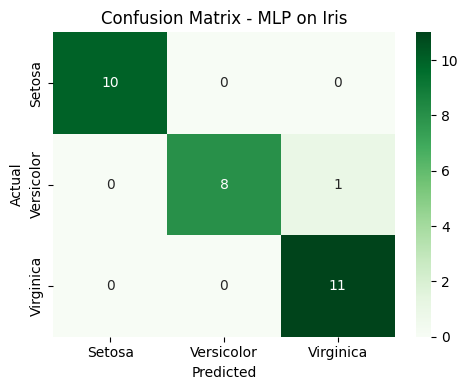

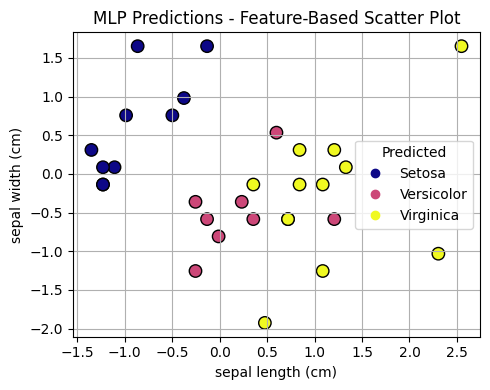

In [5]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# 1. Load the Iris dataset
iris = datasets.load_iris()
x = iris.data
y = iris.target

# 2. Train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# 3. Standardize features
scaler = StandardScaler()
x_train_std = scaler.fit_transform(x_train)
x_test_std = scaler.transform(x_test)

# 4. MLP Classifier (Backpropagation)
mlp = MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000, learning_rate_init=0.01, random_state=1)
mlp.fit(x_train_std, y_train)

# 5. Predictions
y_pred = mlp.predict(x_test_std)


# Mapping label numbers to class names
label_map = {0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'}

# Create a DataFrame to compare predicted vs actual labels
summary_df = pd.DataFrame({
    'Predicted': [label_map[p] for p in y_pred],
    'Actual': [label_map[t] for t in y_test]
})

# Display the comparison
print("\n Prediction Summary:")
print(summary_df)

# Count incorrect predictions
wrong_preds = np.sum(y_pred != y_test)
total = len(y_test)

print("\n Wrong predictions out of total:")
print(f"{wrong_preds} / {total}")

# 6. Accuracy percentage
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("\n Percentage Accuracy:")
print(f"{accuracy * 100:.2f}%")


# 7. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
labels = ['Setosa', 'Versicolor', 'Virginica']

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - MLP on Iris")
plt.tight_layout()
plt.show()

# 8. Scatter Plot of Predictions (using first 2 features)

feature1 = 0  # Sepal length
feature2 = 1  # Sepal width

plt.figure(figsize=(5, 4))
scatter = plt.scatter(
    x_test_std[:, feature1],
    x_test_std[:, feature2],
    c=y_pred,
    cmap='plasma',
    edgecolor='k',
    s=80
)

plt.xlabel(iris.feature_names[feature1])
plt.ylabel(iris.feature_names[feature2])
plt.title("MLP Predictions - Feature-Based Scatter Plot")
plt.grid(True)

# Add legend
legend_labels = ['Setosa', 'Versicolor', 'Virginica']
plt.legend(handles=scatter.legend_elements()[0], labels=legend_labels, title="Predicted")

plt.tight_layout()
plt.show()

